In [41]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
# library(xkcd)
# library(sysfonts)

source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")

In [42]:
#get correct home path based on os 
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

fig_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/figures/')

In [43]:
reg_obs_data <- read_csv('all_reg_obs_data.csv',col_types = cols())

Warning message:
“Missing column names filled in: 'X1' [1]”

In [44]:
head(reg_obs_data)

X1,response,stimulus,rt,condition,subj_idx,B,cpp,cp_with_slow_fast,epoch_trial_zero_idx,shifted_epoch_trial_zero_idx,epoch_n,v_reg,t_reg
0,0,0,0.7115700,hc,761,0.0000000,0.09947117,1,0,0,1,0.192892166,0.1140594
1,1,0,0.6814098,hc,761,0.0000000,0.03507879,0,1,1,1,0.192892166,0.1157156
2,0,0,0.7671180,hc,761,-1.2410069,0.02307522,0,2,2,1,-0.003730408,0.1160243
3,1,0,0.5072088,hc,761,-0.5957808,0.01988090,0,3,3,1,0.098497889,0.1161064
4,0,0,0.6562591,hc,761,-0.3061348,0.01853869,0,4,4,1,0.144388795,0.1161410
5,0,0,0.3423209,hc,761,-0.1393938,0.26853762,0,5,5,1,0.170806901,0.1097111


In [45]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of drift rate 
reg_obs_data['v_reg_flipped'] = reg_obs_data$v_reg
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'v_reg'])

In [123]:
#when the stimulus is 0 and the response is 0 (when correct), take abs. val of drift rate 
reg_obs_data['B_flipped'] = reg_obs_data$B
reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B_flipped'] = abs(reg_obs_data[(reg_obs_data$stimulus==0 & reg_obs_data$response==0), 'B'])

In [89]:
reg_obs_data['accuracy'] = as.numeric(reg_obs_data$response == reg_obs_data$stimulus)
reg_obs_data['trial'] = rep(1:600, 24*4)

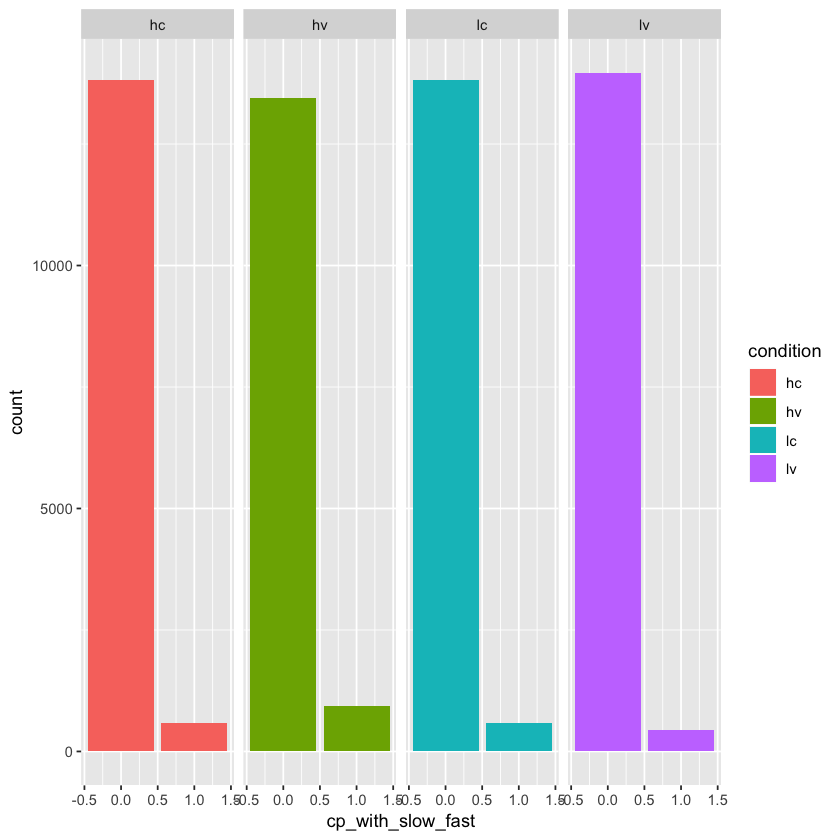

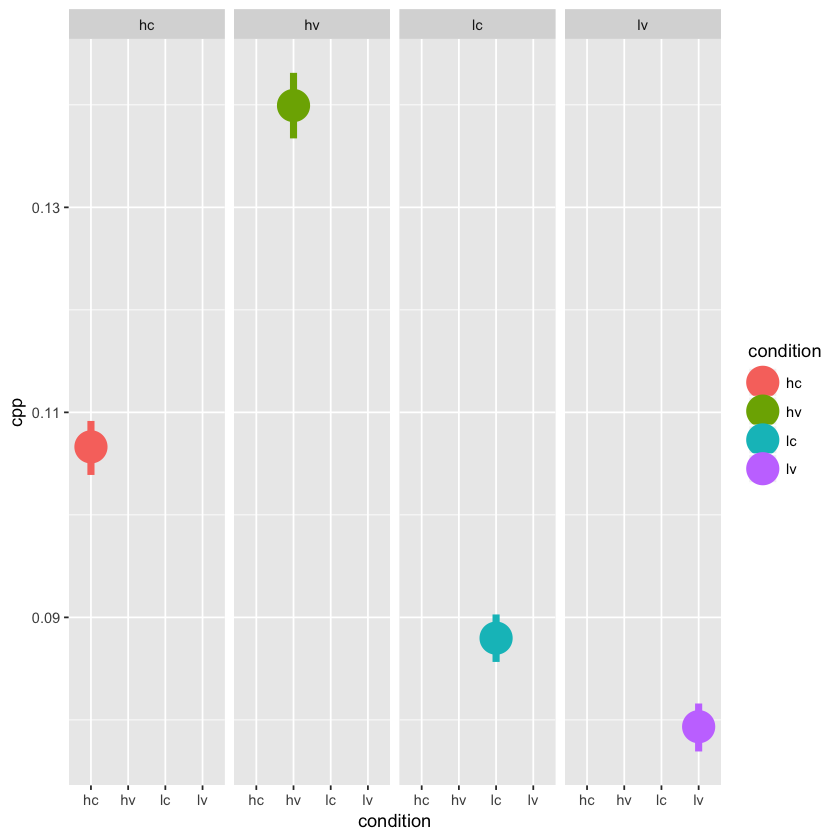

In [72]:
#sanity checks 
ggplot(reg_obs_data, aes(cp_with_slow_fast, fill=condition)) + geom_bar() + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=cpp, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

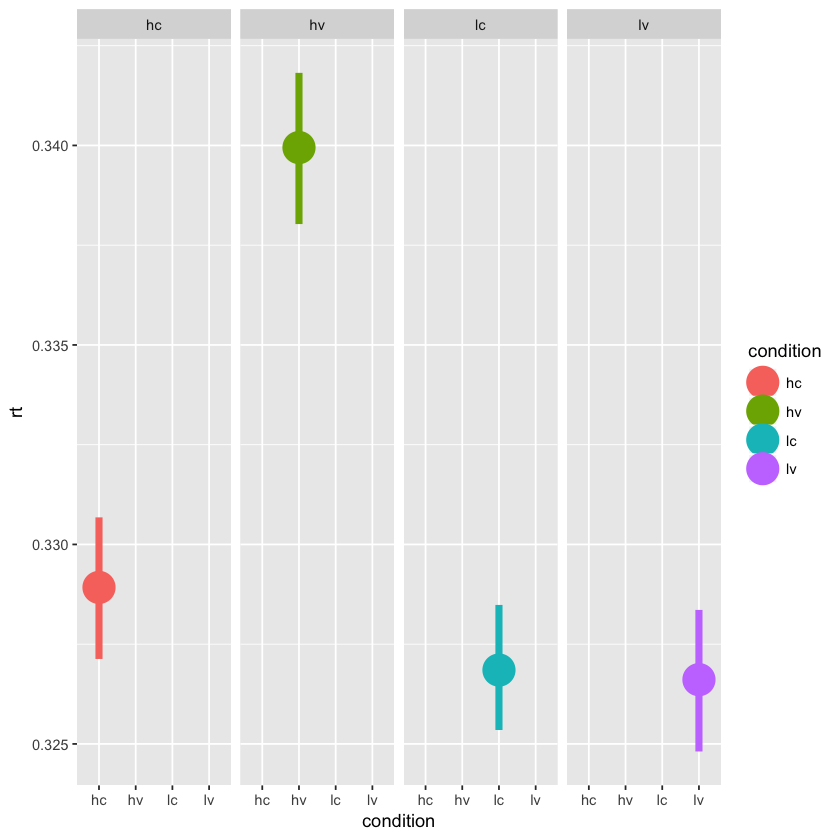

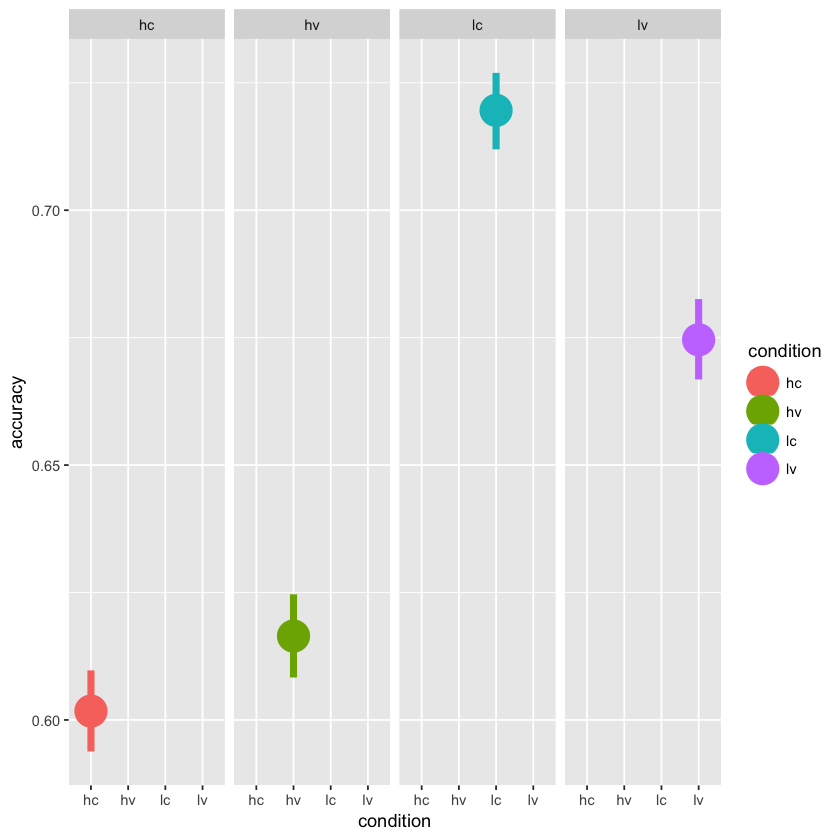

In [78]:
ggplot(reg_obs_data, aes(x=condition, y=rt, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)
ggplot(reg_obs_data, aes(x=condition, y=accuracy, color=condition)) + stat_summary(fun.data = mean_cl_boot, geom = "pointrange", size=2) + facet_grid(.~condition)

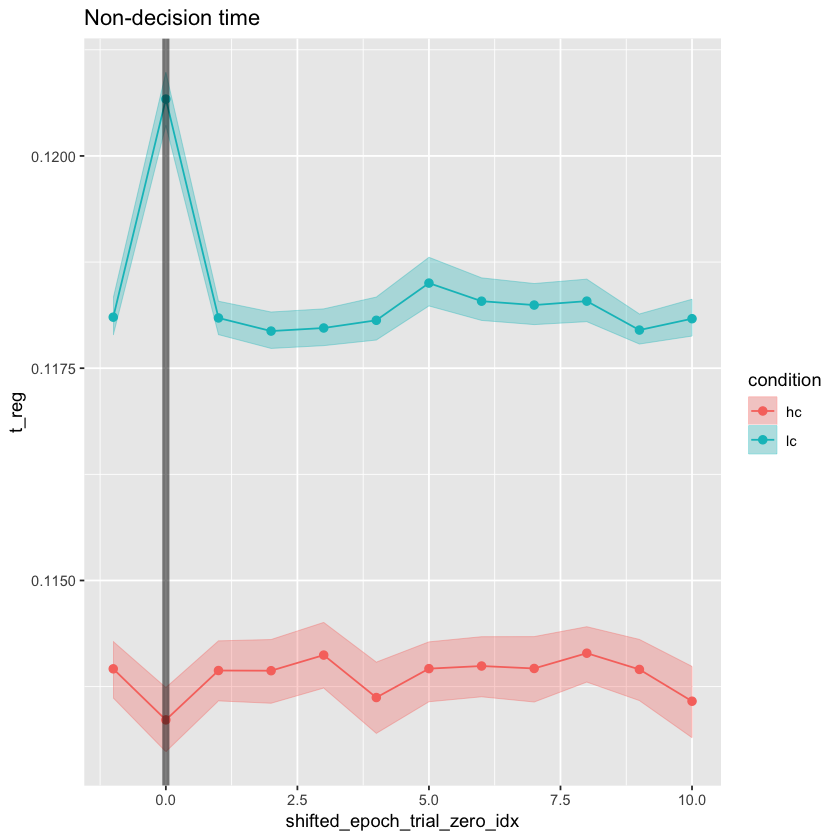

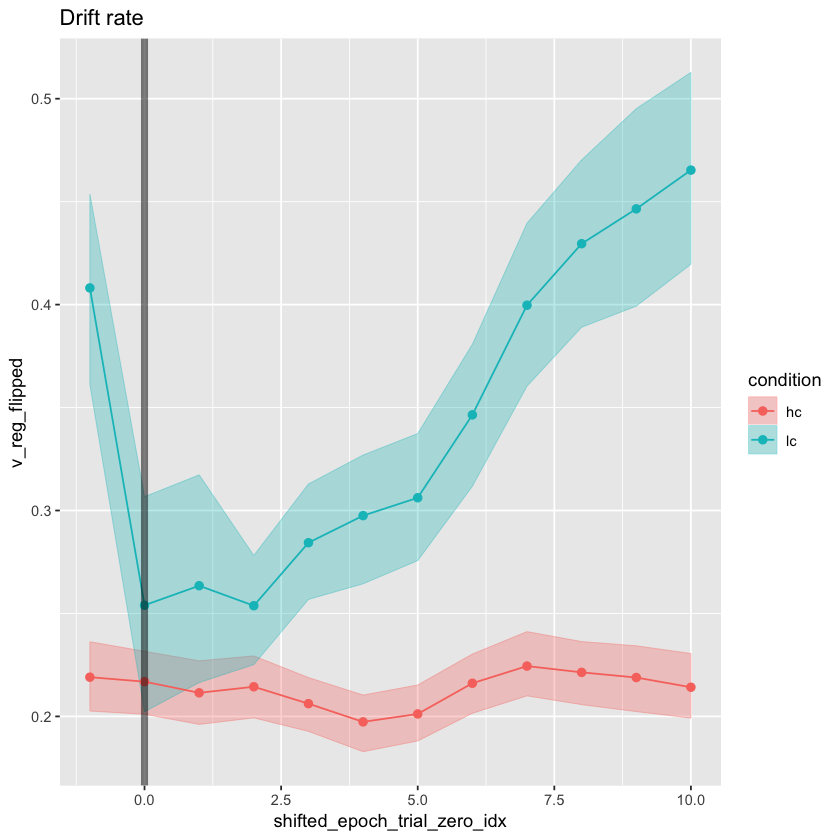

In [106]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time') 

ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

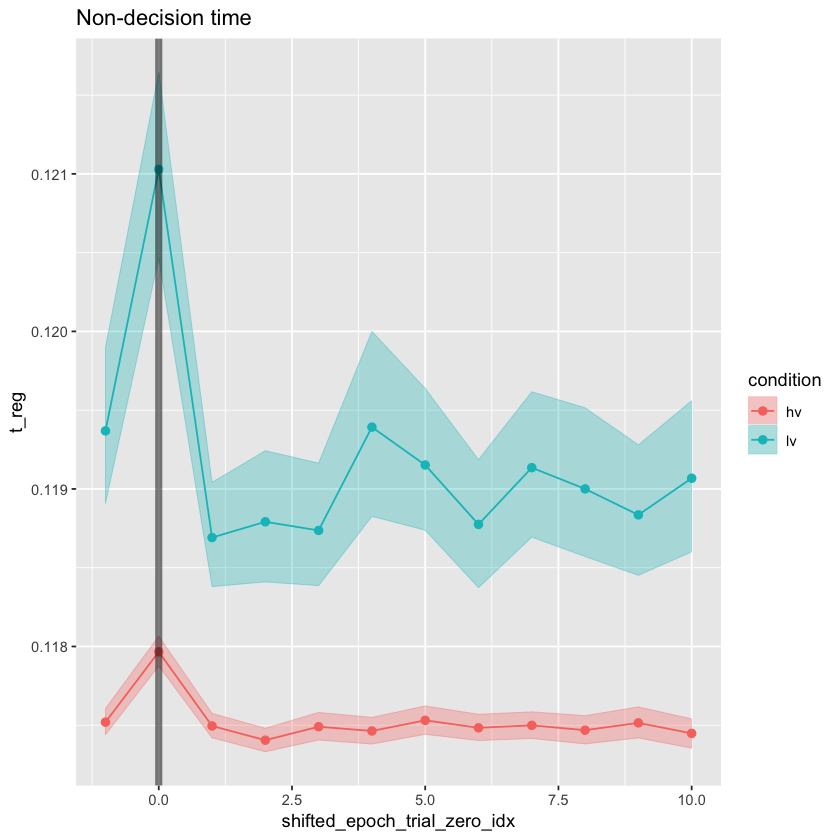

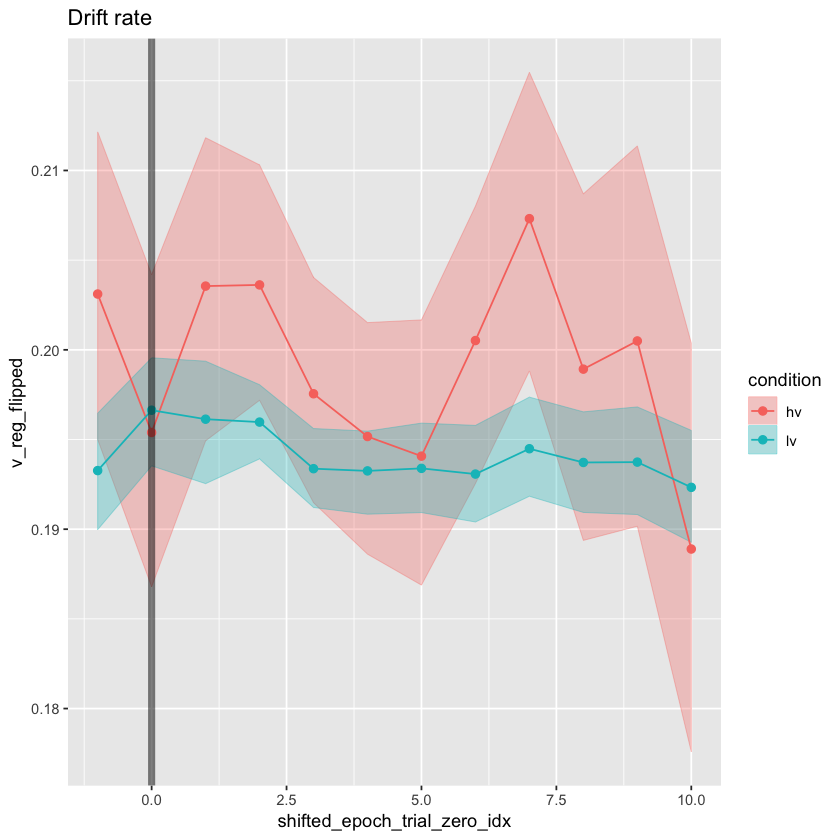

In [119]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, t_reg, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Non-decision time')

ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, v_reg_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('Drift rate')

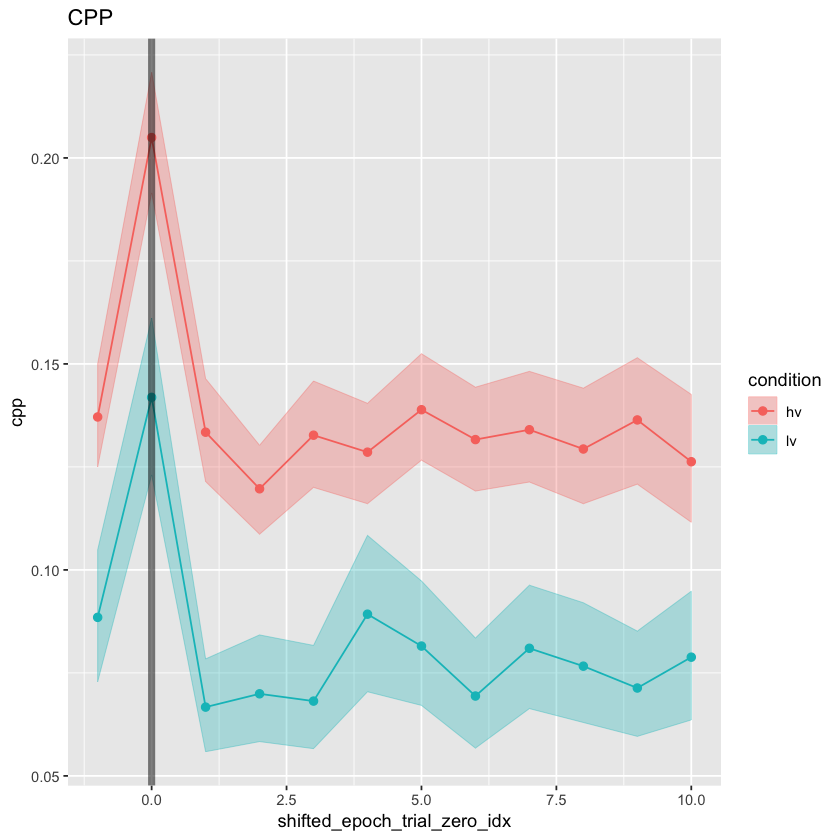

In [120]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

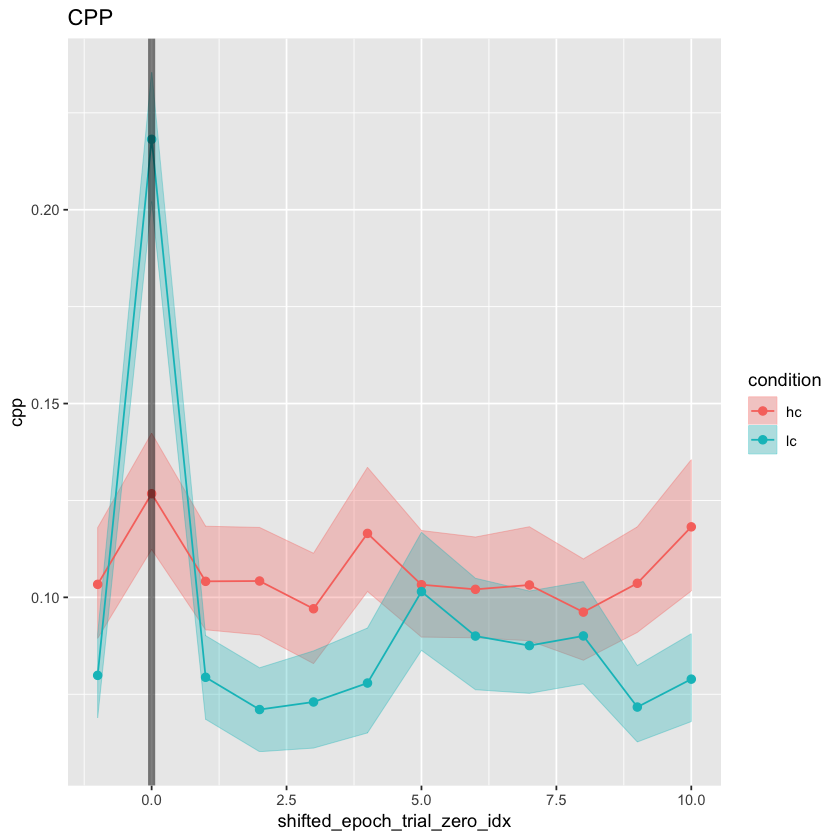

In [122]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'lc'| condition == 'hc'))), aes(shifted_epoch_trial_zero_idx, cpp, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('CPP')

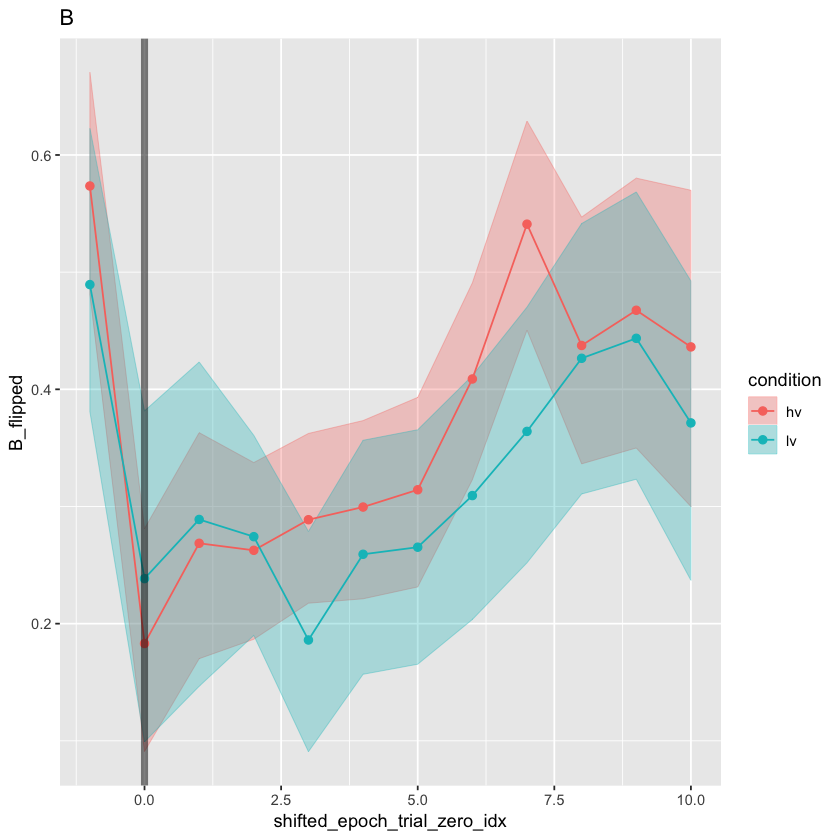

In [124]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hv'| condition == 'lv'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')

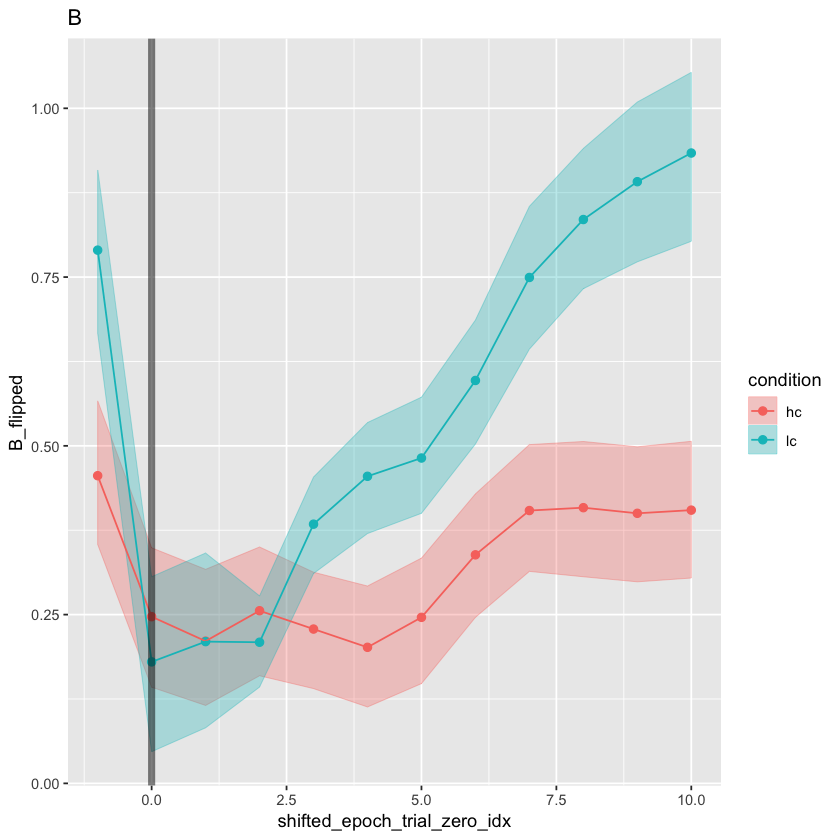

In [125]:
ggplot(subset(reg_obs_data, (shifted_epoch_trial_zero_idx <= 10 & shifted_epoch_trial_zero_idx > -2 & epoch_n > 1 & (condition == 'hc'| condition == 'lc'))), aes(shifted_epoch_trial_zero_idx, B_flipped, col=condition)) + 
stat_summary(fun.data = mean_cl_boot, geom = "ribbon", size=.1,  alpha=0.3, aes(fill=condition)) + stat_summary(fun.y = mean, geom = "point", size=2) +
stat_summary(fun.y = mean, geom = "line") + geom_vline(xintercept = 0, size=2, alpha=0.5) + ggtitle('B')